# Optimal tour

We handle and visualize solutions for the Traveling Salesman Problem (TSP) using three different datasets: eil51, a280, and pcb442. It includes functions to read TSP data (city coordinates) and tour data (the sequence of cities to be visited), which are stored in separate text files. The `read_tsp_data function` extracts city coordinates from a TSP file and returns a list of coordinates, while the `read_tour_data function` reads the tour file to get the sequence of city visits.

The code then plots the optimal tour paths for each dataset using matplotlib. This visualization represents the sequence of cities in the tour as per the order given in the tour files. The paths for each dataset are displayed in a 1x3 subplot grid, where each subplot corresponds to one of the datasets.

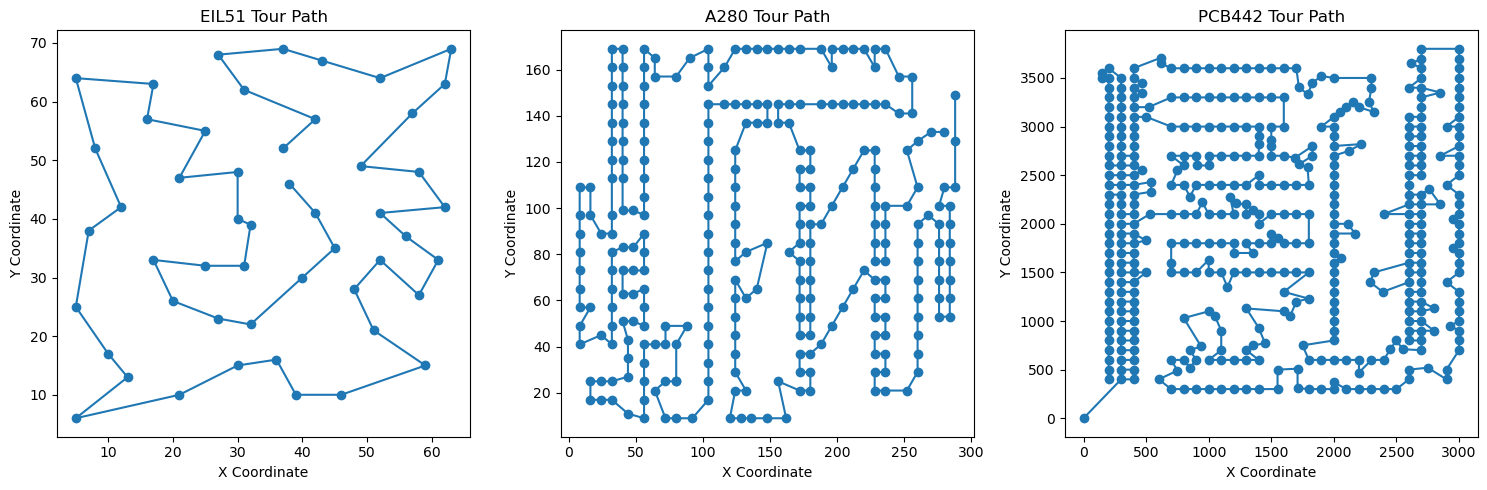

{'eil51': 429.98331198338406,
 'a280': 2586.7696475631606,
 'pcb442': 50783.54751373533}

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

# Loading and processing data for three different TSP datasets: eil51, a280, and pcb442
file_paths = {
    'eil51': ("eil51.tsp.txt", "eil51.opt.tour.txt"),
    'a280': ("a280.tsp.txt", "a280.opt.tour.txt"),
    'pcb442': ("pcb442.tsp.txt", "pcb442.opt.tour.txt")
}

# Function to read TSP data
def read_tsp_data(tsp_file):
    with open(tsp_file, 'r') as file:
        tsp_data = file.readlines()
    tsp_coords = [(float(line.split()[1]), float(line.split()[2])) for line in tsp_data if line.strip() and line.split()[0].isdigit()]
    return tsp_coords

# Function to read tour data
def read_tour_data(tour_file):
    with open(tour_file, 'r') as file:
        tour_data = file.readlines()
    tour = [int(line.strip()) for line in tour_data if line.strip().isdigit()]
    return tour

# Function to calculate the length of the tour
def calculate_tour_length(df, tour):
    tour_length = 0
    for i in range(len(tour)):
        current_city = df.loc[tour[i]]
        next_city = df.loc[tour[(i + 1) % len(tour)]]
        tour_length += ((current_city['x'] - next_city['x'])**2 + (current_city['y'] - next_city['y'])**2) ** 0.5
    return tour_length

# Process data 
tsp_data = {}
for dataset, (tsp_file, tour_file) in file_paths.items():
    coords = read_tsp_data(tsp_file)
    tour = read_tour_data(tour_file)
    df_coords = pd.DataFrame(coords, columns=['x', 'y'], index=range(1, len(coords) + 1))
    tsp_data[dataset] = (df_coords, tour)

# Plotting 
plt.figure(figsize=(15, 5))


for i, (dataset, (df_coords, tour)) in enumerate(tsp_data.items(), 1):
    plt.subplot(1, 3, i)
    reordered_df = df_coords.reindex(tour)
    plt.plot(reordered_df['x'], reordered_df['y'], marker='o')
    plt.title(f"{dataset.upper()} Tour Path")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()

# Calculate and print the tour lengths for each dataset
tour_lengths = {dataset: calculate_tour_length(df_coords, tour) for dataset, (df_coords, tour) in tsp_data.items()}
tour_lengths
